In [47]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import re
import string
from textblob import TextBlob
import math

In [48]:
data=pd.read_excel('F:\\Datasets\\comedian_corpus.xlsx', encoding='latin1')
data.head()

,URL,Comedian,Special,full_script
0,https://scrapsfromtheloft.com/2018/05/05/john-...,John Mulaney,Kid Gorgeous At Radio City,welcome to radio city music hall its time any...
1,https://scrapsfromtheloft.com/2017/09/25/john-...,John Mulaney,New In Town,new in town john mulaneys new in town h...
2,https://scrapsfromtheloft.com/2017/08/02/john-...,John Mulaney,The Comeback Kid,armed with boyish charm and a sharp wit the fo...
3,https://scrapsfromtheloft.com/2018/05/15/ali-w...,Ali Wong,Hard Knock Wife,ladies and gentlemen please welcome to the sta...
4,https://scrapsfromtheloft.com/2017/09/19/ali-w...,Ali Wong,Baby Cobra,ladies and gentlemen please welcome to the sta...


### Sentiment Analysis of each Special

Using the textblob library to analyse the sentiments of eacho fthe special, and see if they tend to be more opinion based or fact based

In [49]:
#Polarity & Subjectivity

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['full_script'].apply(pol)
data['subjectivity'] = data['full_script'].apply(sub)
data['special_name']=data['Special']

data=data.set_index('Special')

data.head()

,URL,Comedian,full_script,polarity,subjectivity,special_name
Special,,,,,,
Kid Gorgeous At Radio City,https://scrapsfromtheloft.com/2018/05/05/john-...,John Mulaney,welcome to radio city music hall its time any...,0.086796,0.495975,Kid Gorgeous At Radio City
New In Town,https://scrapsfromtheloft.com/2017/09/25/john-...,John Mulaney,new in town john mulaneys new in town h...,0.106584,0.513413,New In Town
The Comeback Kid,https://scrapsfromtheloft.com/2017/08/02/john-...,John Mulaney,armed with boyish charm and a sharp wit the fo...,0.077884,0.484386,The Comeback Kid
Hard Knock Wife,https://scrapsfromtheloft.com/2018/05/15/ali-w...,Ali Wong,ladies and gentlemen please welcome to the sta...,0.078839,0.490820,Hard Knock Wife
Baby Cobra,https://scrapsfromtheloft.com/2017/09/19/ali-w...,Ali Wong,ladies and gentlemen please welcome to the sta...,0.071759,0.477889,Baby Cobra


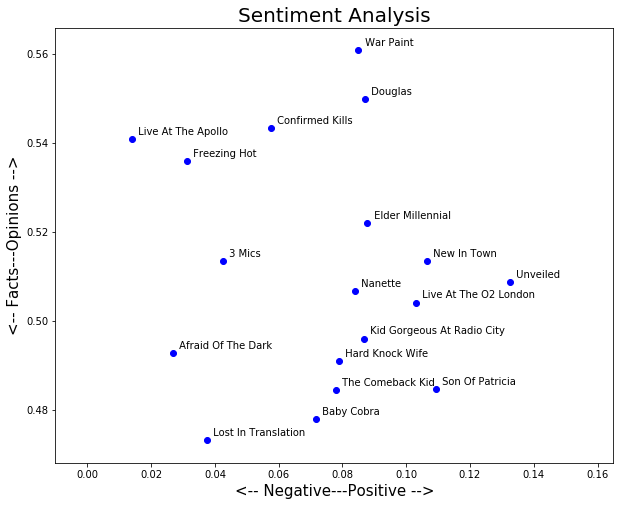

In [50]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, spesh in enumerate(data.index):
    x = data.polarity.loc[spesh]
    y = data.subjectivity.loc[spesh]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['special_name'][index], fontsize=10)
    plt.xlim(-.01, .165) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative---Positive -->', fontsize=15)
plt.ylabel('<-- Facts---Opinions -->', fontsize=15)

plt.show()

### Inference

1. John Mulaney's early specials were opinion based, but he has gotten more factual and negative as time progressed (Kid Gorgeous, New in Town, Comeback Kid)
2. Ali Wong tends to be more factual but negative(Baby Cobra, Hard Knock Wife)
3. Hannah Gadsby shows the most variation between her specials(Nannete, Douglas, 3 Mics)
4. Iliza Schlesinger's comedy tends to be more positive and opinion based, also accompanied by very energetic and vibrant delivery. (War Paint, Confirmed Kills, Freezing Hot, Elder Millenial, Unveiled)
5. Trevor Noah varies from facts or opinion based specials but tends to be more on th enegative side(Afraid of the Dark, Lost in Translation, Live at the Apollo, Live at the 02, Son of Patricia)

## Sentiment analysis of individual Specials over their runtime

In [62]:
#diving every special into 20 parts

def split_text(text, n=20):
    
    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [63]:
list_pieces = []
for t in data.full_script:
    split = split_text(t)
    list_pieces.append(split)
    
#list_pieces

In [64]:
#Polarity of Special

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
#polarity_transcript

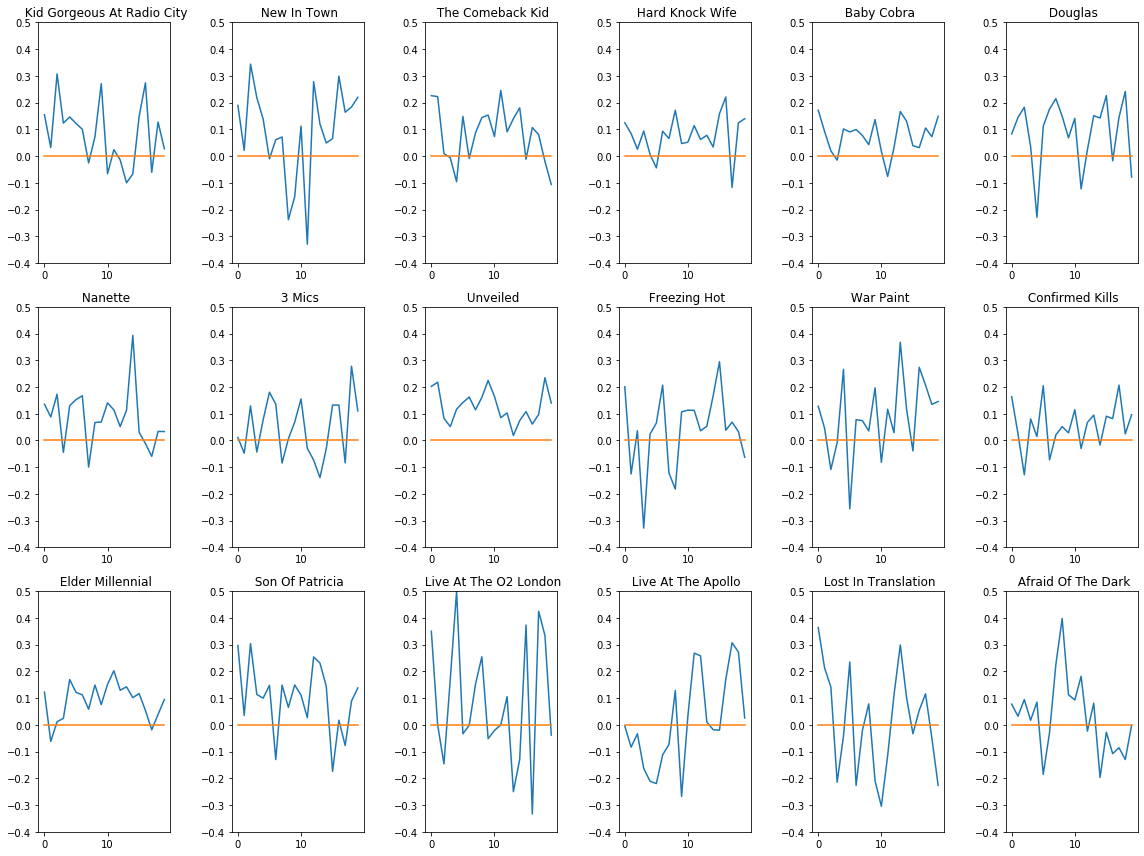

In [61]:
plt.rcParams['figure.figsize'] = [16, 12]
#Polarity vs Length of special graph
for index, spesh in enumerate(data.index):    
    plt.subplot(3, 6, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,20), np.zeros(20))
    plt.title(data['special_name'][index])
    plt.ylim(ymin=-.4, ymax=.5)
    
plt.tight_layout()
plt.show()

### Inferences
1. John Mulaney's shows a variety of sentiment variations throughtout his sets(Kid Gorgeous, New in Town, Comeback Kid)
2. Ali Wong starts and ends affairs on a positive note(Baby Cobra, Hard Knock Wife)
3. Hannah Gadsby starts off positive but ends on a relatively negative note(Nannete, Douglas, 3 Mics)
4. Iliza Schlesinger is almost consistently positive throughout her comedy, with Unveiled being the most positive special in this set. (War Paint, Confirmed Kills, Freezing Hot, Elder Millenial, Unveiled)
5. Trevor Noah starts off positively and ends negatively, but takes you on a rollercoaster of polarities through his bits in the middle(Afraid of the Dark, Lost in Translation, Live at the Apollo, Live at the 02, Son of Patricia)

# And now for no reason at all, my favourite specials from the list: 
##### Kid Gorgeous at Radio City by John Mulaney
##### Douglas by Hannah Gadsby
##### Baby Cobra by Ali Wong

### Things I would've liked to do/ will try to do in the future:
Try to get hold of the audio track or somehow extract the audience noise to see map how the audiences reacted to their bits ina special and find which jokes where funny and why